# A rotating mesh with spots

In [18]:
from spice.models import IcosphereModel
from spice.models.mesh_transform import add_rotation, evaluate_rotation
from spice.models.spots import add_spots
from spice.plots import plot_3D
from spice.spectrum import simulate_spectrum
import astropy.units as u
import jax.numpy as jnp
import numpy as np
from transformer_payne import TransformerPayne, BlackbodyFlux

from jax import config
config.update('jax_platform_name', 'cpu')
config.update("jax_enable_x64", True)

Let's use the simplest example for the sake of speed - the blackbody flux from the ```transformer_payne``` package.

In [2]:
bb = BlackbodyFlux()

The API is in the functional paradigm - you pass a "model" mesh, and the function returns a modified version of the mesh. However, the original passed mesh still remains if you choose not to overwrite these variables.

In [9]:
base_temp = 5700.
spot_temp = 20000.
spot_diff = spot_temp - base_temp

m = IcosphereModel.construct(1000, u.solRad.to(u.cm), 1., 1., bb.to_parameters(dict(teff=base_temp)))

ms = add_spots(mesh=m,
              thetas=jnp.array([1.]),
              phis=jnp.array([0.]),
              param_deltas=jnp.array([spot_diff]),
              radii=jnp.array([0.25]),
              radius_factors=jnp.array([.75]),
              param_indices=jnp.array([0.]))

In [12]:
TIMESTAMPS = np.linspace(0, 3600*10, 50)

mt = add_rotation(ms, 100, jnp.array([0., 0., 1.]))
mts = [evaluate_rotation(mt, t) for t in TIMESTAMPS]

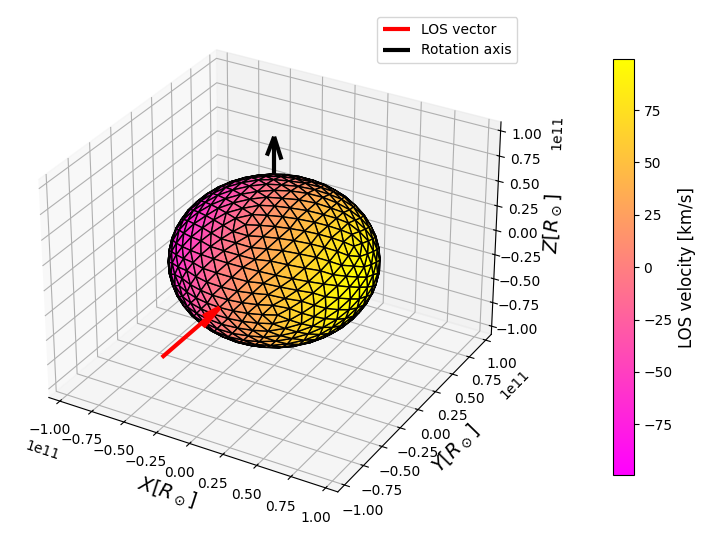

In [15]:
_, _ = plot_3D(mts[0], 'los_velocities', cmap='spring')

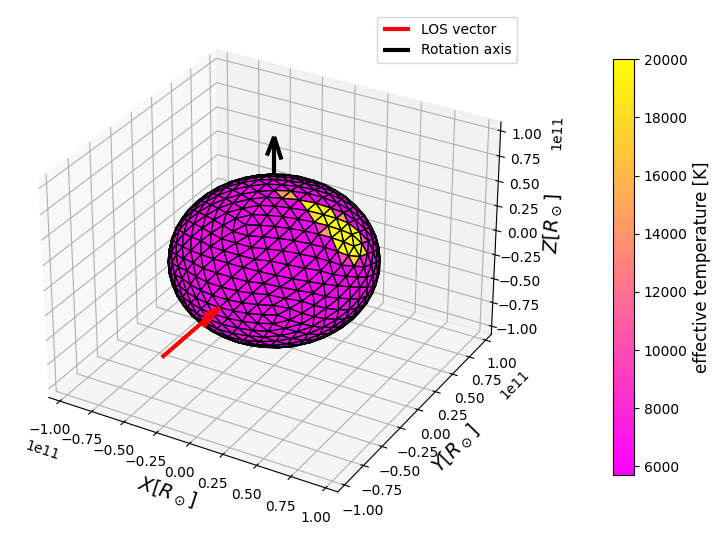

In [16]:
_, _ = plot_3D(mts[0], 0, cmap='spring', property_label='effective temperature [K]')

## Spectrum emulation

In [19]:
vws = jnp.linspace(1000., 8000., 1000)
specs = [simulate_spectrum(bb.intensity, mt0, jnp.log10(vws)) for mt0 in mts]

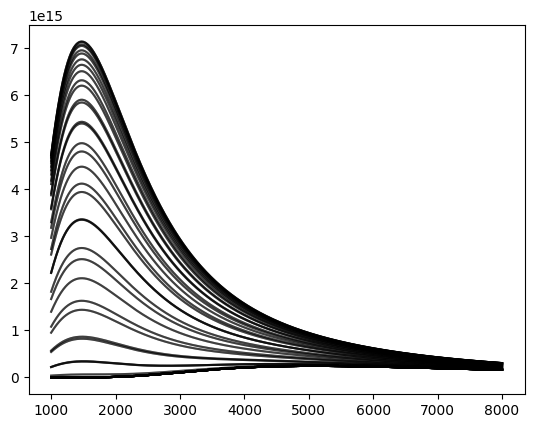

In [20]:
import matplotlib.pyplot as plt

for spec in specs:
    plt.plot(vws, spec, color='black', alpha=0.5)

In [21]:
from spice.plots.plot_mesh import plot_3D

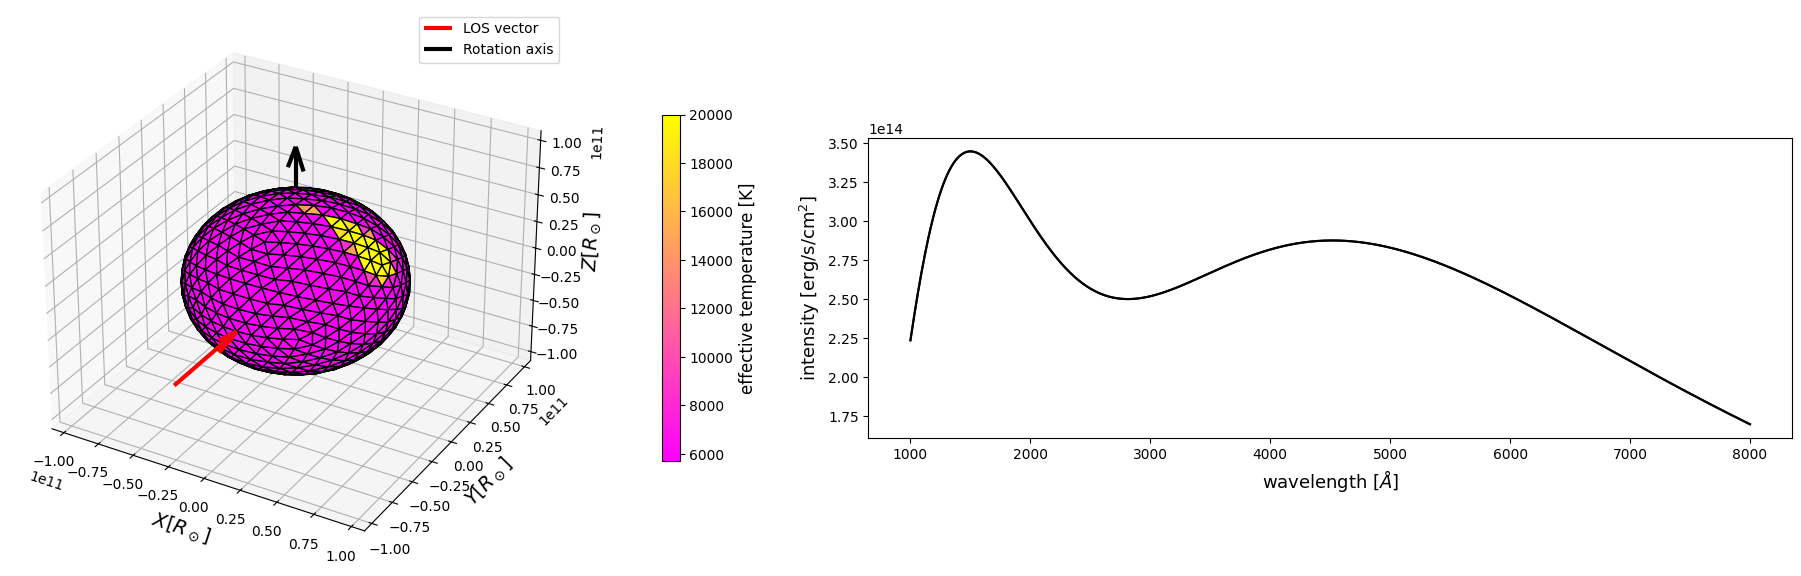

In [22]:
i = 0

fig = plt.figure(figsize=(24, 10))
spec = fig.add_gridspec(10, 24)
plot_ax = fig.add_subplot(spec[:, :10], projection='3d')
plot_ax.view_init(elev=30, azim=-60)

spectrum_ax = fig.add_subplot(spec[3:7, 11:-1])
spectrum_ax.set_xlabel('wavelength [$\\AA$]', fontsize=13)
spectrum_ax.set_ylabel('intensity [erg/s/cm$^2$]', fontsize=13)

plt.plot(vws, specs[i], color='black')

plot_3D(mts[i], 0, (fig, plot_ax), cmap='spring', property_label='effective temperature [K]');

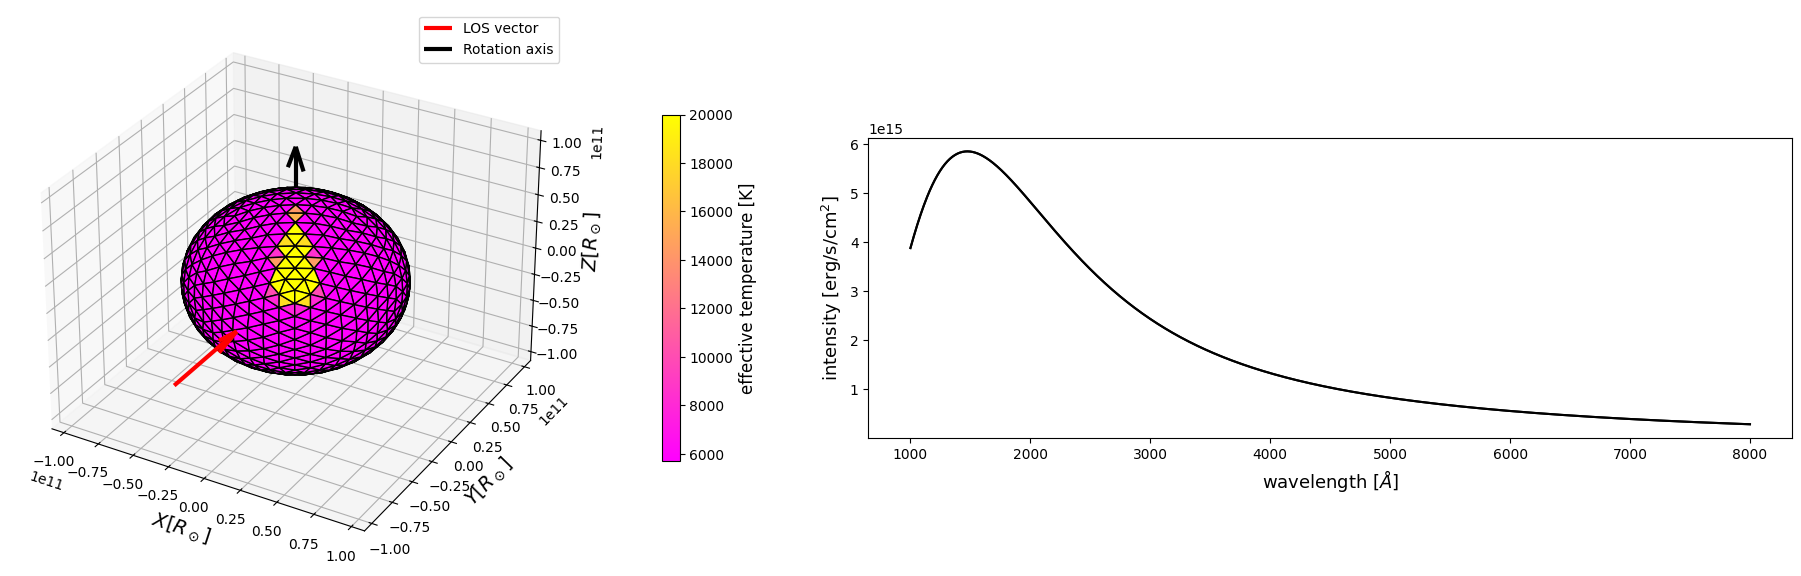

In [23]:
i = 10

fig = plt.figure(figsize=(24, 10))
spec = fig.add_gridspec(10, 24)
plot_ax = fig.add_subplot(spec[:, :10], projection='3d')
plot_ax.view_init(elev=30, azim=-60)

spectrum_ax = fig.add_subplot(spec[3:7, 11:-1])
spectrum_ax.set_xlabel('wavelength [$\\AA$]', fontsize=13)
spectrum_ax.set_ylabel('intensity [erg/s/cm$^2$]', fontsize=13)

plt.plot(vws, specs[i], color='black')

plot_3D(mts[i], 0, (fig, plot_ax), cmap='spring', property_label='effective temperature [K]');